In [1]:
import pandas as pd

test_gr_truth = pd.read_csv('test2_new.txt', sep='|', header=None)

In [2]:
test_gr_truth.head()

,0,1,2
0,200031,30877,1
1,200031,8244,1
2,200031,130183,0
3,200031,198762,0
4,200031,34503,1


In [3]:
test_gr_truth.columns = ['UserID', 'ItemID', 'Predictor']

In [4]:
test_gr_truth.head()

,UserID,ItemID,Predictor
0,200031,30877,1
1,200031,8244,1
2,200031,130183,0
3,200031,198762,0
4,200031,34503,1


In [5]:
len(test_gr_truth)

6000

In [6]:
train_hw5 = pd.read_csv('output2.txt', sep='|', header=None)

In [7]:
train_hw5.head()

,0,1,2,3,4
0,199810,208019,0.0,0.0,0.0
1,199810,74139,0.0,0.0,0.0
2,199810,9903,0.0,0.0,0.0
3,199810,242681,0.0,0.0,0.0
4,199810,18515,0.0,70.0,0.0


In [8]:
len(train_hw5)

120000

In [9]:
train_hw5.columns=['UserID', 'ItemID', 'Rating1', 'Rating2', 'Rating3']

In [10]:
train_hw5.head()

,UserID,ItemID,Rating1,Rating2,Rating3
0,199810,208019,0.0,0.0,0.0
1,199810,74139,0.0,0.0,0.0
2,199810,9903,0.0,0.0,0.0
3,199810,242681,0.0,0.0,0.0
4,199810,18515,0.0,70.0,0.0


In [11]:
pred_matrix = test_gr_truth.drop(columns='Predictor')

In [12]:
pred_matrix.head()

,UserID,ItemID
0,200031,30877
1,200031,8244
2,200031,130183
3,200031,198762
4,200031,34503


In [13]:
pred_matrix['Rating1'] = 0
pred_matrix['Rating2'] = 0
pred_matrix['Rating3'] = 0

pred_matrix.head()

,UserID,ItemID,Rating1,Rating2,Rating3
0,200031,30877,0,0,0
1,200031,8244,0,0,0
2,200031,130183,0,0,0
3,200031,198762,0,0,0
4,200031,34503,0,0,0


In [14]:
response = test_gr_truth['Predictor']
response.head()

0    1
1    1
2    0
3    0
4    1
Name: Predictor, dtype: int64

For Predictor Matrix now we need to fill in the corresponding rating values after looking in the training data (train_hw5 dataframe). 

In [15]:
train_hw5.head()

,UserID,ItemID,Rating1,Rating2,Rating3
0,199810,208019,0.0,0.0,0.0
1,199810,74139,0.0,0.0,0.0
2,199810,9903,0.0,0.0,0.0
3,199810,242681,0.0,0.0,0.0
4,199810,18515,0.0,70.0,0.0


In [16]:
train_hw5[train_hw5['UserID']==199810]

,UserID,ItemID,Rating1,Rating2,Rating3
0,199810,208019,0.0,0.0,0.0
1,199810,74139,0.0,0.0,0.0
2,199810,9903,0.0,0.0,0.0
3,199810,242681,0.0,0.0,0.0
4,199810,18515,0.0,70.0,0.0
5,199810,105760,0.0,90.0,0.0


In [17]:
train_hw5['Rating2'][5]

90.0

In [18]:
train_hw5[train_hw5['UserID']==199810][train_hw5['ItemID']==242681]

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,UserID,ItemID,Rating1,Rating2,Rating3
3,199810,242681,0.0,0.0,0.0


In [19]:
train_hw5[train_hw5['UserID']==199810][train_hw5['ItemID']==105760]['Rating2']

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5    90.0
Name: Rating2, dtype: float64

In [20]:
for i in range(len(pred_matrix)):
    user = pred_matrix['UserID'][i]
    item = pred_matrix['ItemID'][i]
    pred_matrix['Rating1'][i] = train_hw5[train_hw5['UserID']==user][train_hw5['ItemID']==item]['Rating1']
    pred_matrix['Rating2'][i] = train_hw5[train_hw5['UserID']==user][train_hw5['ItemID']==item]['Rating2']
    pred_matrix['Rating3'][i] = train_hw5[train_hw5['UserID']==user][train_hw5['ItemID']==item]['Rating3']

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [21]:
pred_matrix.head(6)

,UserID,ItemID,Rating1,Rating2,Rating3
0,200031,30877,90,50,0
1,200031,8244,90,0,0
2,200031,130183,0,0,0
3,200031,198762,0,0,0
4,200031,34503,90,50,0
5,200031,227283,0,90,0


In [22]:
train_hw5[train_hw5['UserID']==200031]

,UserID,ItemID,Rating1,Rating2,Rating3
570,200031,30877,90.0,50.0,0.0
571,200031,8244,90.0,0.0,0.0
572,200031,130183,0.0,0.0,0.0
573,200031,198762,0.0,0.0,0.0
574,200031,34503,90.0,50.0,0.0
575,200031,227283,0.0,90.0,0.0


As we can see above, the values match up and therefore have been copied thoroughly. Just to be sure, we will also check the values for the last 6 instances. 

In [23]:
pred_matrix.tail(6)

,UserID,ItemID,Rating1,Rating2,Rating3
5994,212234,217037,0,0,0
5995,212234,137371,0,0,0
5996,212234,42375,0,0,0
5997,212234,277867,90,90,0
5998,212234,83093,90,90,0
5999,212234,239143,90,90,0


In [24]:
train_hw5[train_hw5['UserID']==212234]

,UserID,ItemID,Rating1,Rating2,Rating3
30108,212234,217037,0.0,0.0,0.0
30109,212234,137371,0.0,0.0,0.0
30110,212234,42375,0.0,0.0,0.0
30111,212234,277867,90.0,90.0,0.0
30112,212234,83093,90.0,90.0,0.0
30113,212234,239143,90.0,90.0,0.0


Therefore, the ratings have been copied from the training data and we can now move to applying different classifiers. 

In [25]:
pred_matrix.head()

,UserID,ItemID,Rating1,Rating2,Rating3
0,200031,30877,90,50,0
1,200031,8244,90,0,0
2,200031,130183,0,0,0
3,200031,198762,0,0,0
4,200031,34503,90,50,0


In [26]:
df = pd.merge(pred_matrix, response, right_index=True, left_index=True)

In [63]:
df.head()

,UserID,ItemID,Rating1,Rating2,Rating3,Predictor
0,200031,30877,90,50,0,1
1,200031,8244,90,0,0,1
2,200031,130183,0,0,0,0
3,200031,198762,0,0,0,0
4,200031,34503,90,50,0,1


In [64]:
len(df)

6000

In [65]:
df.to_csv('data.csv', index=False)

In [66]:
from pyspark.sql import SparkSession

In [67]:
spark = SparkSession.builder.appName('recommender').getOrCreate()

In [68]:
df1 = spark.read.csv('data.csv', header=True, inferSchema=True)
df1.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- ItemID: integer (nullable = true)
 |-- Rating1: integer (nullable = true)
 |-- Rating2: integer (nullable = true)
 |-- Rating3: integer (nullable = true)
 |-- Predictor: integer (nullable = true)



In [69]:
df1.select(['Rating1', 'Rating2', 'Rating3']).show(10)

+-------+-------+-------+
|Rating1|Rating2|Rating3|
+-------+-------+-------+
|     90|     50|      0|
|     90|      0|      0|
|      0|      0|      0|
|      0|      0|      0|
|     90|     50|      0|
|      0|     90|      0|
|      0|      0|      0|
|      0|      0|      0|
|     90|     90|      0|
|     90|     90|      0|
+-------+-------+-------+
only showing top 10 rows



In [70]:
df1.show(10)

+------+------+-------+-------+-------+---------+
|UserID|ItemID|Rating1|Rating2|Rating3|Predictor|
+------+------+-------+-------+-------+---------+
|200031| 30877|     90|     50|      0|        1|
|200031|  8244|     90|      0|      0|        1|
|200031|130183|      0|      0|      0|        0|
|200031|198762|      0|      0|      0|        0|
|200031| 34503|     90|     50|      0|        1|
|200031|227283|      0|     90|      0|        0|
|200032|218377|      0|      0|      0|        0|
|200032|110262|      0|      0|      0|        0|
|200032| 18681|     90|     90|      0|        1|
|200032|138493|     90|     90|      0|        1|
+------+------+-------+-------+-------+---------+
only showing top 10 rows



In [72]:
cols = df1.columns

In [73]:
from pyspark.ml.feature import VectorAssembler

In [74]:
assemblerInput = ['Rating1', 'Rating2', 'Rating3']
assembler = VectorAssembler(inputCols = assemblerInput, outputCol = 'features')

In [75]:
assembler

VectorAssembler_fd00260ee10d

In [76]:
stages = []
stages += [assembler]

In [77]:
stages

[VectorAssembler_fd00260ee10d]

In [78]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df1)
df1 = pipelineModel.transform(df1)
selectedCols = ['features'] + cols
df1 = df1.select(selectedCols)
df1.printSchema()

root
 |-- features: vector (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- ItemID: integer (nullable = true)
 |-- Rating1: integer (nullable = true)
 |-- Rating2: integer (nullable = true)
 |-- Rating3: integer (nullable = true)
 |-- Predictor: integer (nullable = true)



In [79]:
train, test = df1.randomSplit([0.7, 0.3], seed = 2018)
print('Training Dataset count: '+str(train.count()))
print('Test Dataset count: '+str(test.count()))

Training Dataset count: 4260
Test Dataset count: 1740


In [80]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Predictor', maxIter=10)
lrModel = lr.fit(train)

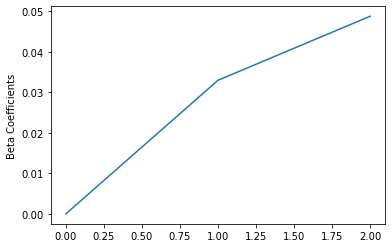

In [81]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

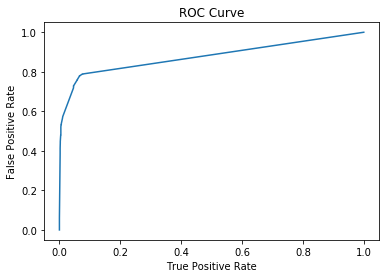

Training set areaUnderROC: 0.8769482916223157


In [87]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'], roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: '+ str(trainingSummary.areaUnderROC))

In [88]:
predictions = lrModel.transform(test)

In [89]:
predictions.columns

['features',
 'UserID',
 'ItemID',
 'Rating1',
 'Rating2',
 'Rating3',
 'Predictor',
 'rawPrediction',
 'probability',
 'prediction']

In [90]:
predictions.show(20)

+---------+------+------+-------+-------+-------+---------+--------------------+--------------------+----------+
| features|UserID|ItemID|Rating1|Rating2|Rating3|Predictor|       rawPrediction|         probability|prediction|
+---------+------+------+-------+-------+-------+---------+--------------------+--------------------+----------+
|(3,[],[])|200031|130183|      0|      0|      0|        0|[1.42818651170501...|[0.80661859601233...|       0.0|
|(3,[],[])|200065|179571|      0|      0|      0|        0|[1.42818651170501...|[0.80661859601233...|       0.0|
|(3,[],[])|200070|104207|      0|      0|      0|        1|[1.42818651170501...|[0.80661859601233...|       0.0|
|(3,[],[])|200070|124239|      0|      0|      0|        0|[1.42818651170501...|[0.80661859601233...|       0.0|
|(3,[],[])|200074|269977|      0|      0|      0|        0|[1.42818651170501...|[0.80661859601233...|       0.0|
|(3,[],[])|200085|138809|      0|      0|      0|        1|[1.42818651170501...|[0.8066185960123

In [92]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol = "rawPrediction", labelCol='Predictor')
print('Test Area Under ROC: ', evaluator.evaluate(predictions))

Test Area Under ROC:  0.8698778033409493


In [99]:
predictions.select('Predictor','prediction').show(100)

+---------+----------+
|Predictor|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        1|       0.0|
|        1|       0.0|
|        0|       0.0|
|        1|

In [ ]:
main_df = spark.read.csv()